## Identifying the Top-Performing Wells

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data from the CSV file
df = pd.read_csv('C:\\Users\\ihsankoo\\Downloads\\Liang_Cleaned.csv')

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

<hr>

I'll start by identifying the top-performing wells in terms of oil, water, and gas production.

For this, I'll aggregate the production data for each well and rank them based on their cumulative production values. Let's begin with oil production.

<hr>

In [34]:
# Aggregating oil production for each well
oil_production_by_well = df.groupby('Well Name')['Oil Production Rate'].sum().sort_values(ascending=False)

# Displaying the top 10 wells in terms of oil production
top_oil_producing_wells = oil_production_by_well.head(10)
top_oil_producing_wells


Well Name
P-4    66403.35
P-1    39957.57
P-3    19993.68
P-2     8126.39
I-1        0.00
I-2        0.00
I-3        0.00
I-4        0.00
I-5        0.00
Name: Oil Production Rate, dtype: float64

<hr>

#### Based on cumulative oil production, the top-performing wells are as follows:

1. P-4: 66,403.35 units
2. P-1: 39,957.57 units
3. P-3: 19,993.68 units
4. P-2: 8,126.39 units

<hr>

Next, let's identify the top-performing wells in terms of water production.

In [35]:
# Aggregating water production for each well
water_production_by_well = df.groupby('Well Name')['Water Production Rate'].sum().sort_values(ascending=False)

# Displaying the top 10 wells in terms of water production
top_water_producing_wells = water_production_by_well.head(10)
top_water_producing_wells


Well Name
P-1    214790.40
P-4    175411.33
P-3     22375.32
P-2      7518.99
I-1         0.00
I-2         0.00
I-3         0.00
I-4         0.00
I-5         0.00
Name: Water Production Rate, dtype: float64

<hr>

#### For cumulative water production, the top-performing wells are:

1. P-1: 214,790.40 units
2. P-4: 175,411.33 units
3. P-3: 22,375.32 units
4. P-2: 7,518.99 units

<hr>

#### Analyzing the Performance of Wells Over Their Lifetime

* To analyze the performance of wells over their lifetime, we can plot the cumulative production (oil, water, and gas) over time for each well. This will provide insights into how each well's performance has evolved since the beginning of its production.

* I'll start by visualizing the cumulative oil production over time for each well.

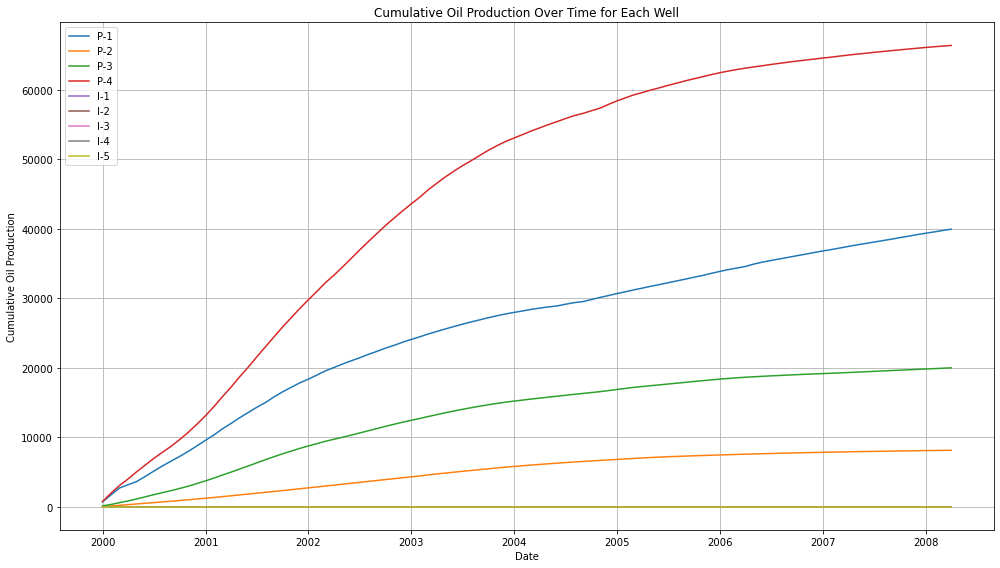

In [36]:
df['Cumulative Oil Production'] = df.groupby('Well Name')['Oil Production Rate'].cumsum()

# Plotting the cumulative oil production over time for each well
plt.figure(figsize=(14, 8))
for well in df['Well Name'].unique():
    subset = df[df['Well Name'] == well]
    plt.plot(subset['Date'], subset['Cumulative Oil Production'], label=well)

plt.title('Cumulative Oil Production Over Time for Each Well')
plt.xlabel('Date')
plt.ylabel('Cumulative Oil Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

* P-4 has the highest cumulative oil production and shows a consistent increase over its lifetime.
* P-1 and P-3 also exhibit steady increases in cumulative oil production.
* P-2 has a lower cumulative oil production compared to the other producer wells.
* As expected, injector wells show no oil production.
* From this plot, we can infer the performance and productivity of each well over its operational lifespan.

<hr>

Below is an interactive dropdown for selecting different wells and viewing their "Cumulative Oil Production Over Time"

In [37]:
# List of unique wells
wells = df['Well Name'].unique()

# Calculate the cumulative oil production for each well
df['Cumulative Oil Production'] = df.groupby('Well Name')['Oil Production Rate'].cumsum()

# Create an empty figure for Cumulative Oil Production
fig_cumulative_oil = go.Figure()

# Add an interactive dropdown menu for Cumulative Oil Production
buttons_cumulative_oil = []
for well in wells:
    well_df = df[df['Well Name'] == well]
    years = well_df['Date'].dt.year.unique()
    visible = [well == w for w in wells]
    
    button = dict(label=well,
                  method='update',
                  args=[{'visible': visible},
                        {'title': f'Cumulative Oil Production Over Time for {well}',
                         'xaxis': {'tickvals': years, 'ticktext': years, 'rangeslider': {'visible': True}}}],
                  )
    buttons_cumulative_oil.append(button)
    
    fig_cumulative_oil.add_trace(go.Scatter(x=well_df['Date'], y=well_df['Cumulative Oil Production'], mode='lines', name=well))

# Update the layout for Cumulative Oil Production
fig_cumulative_oil.update_layout(title=f'Cumulative Oil Production Over Time',
                                 xaxis_title='Date', 
                                 yaxis_title='Cumulative Oil Production',
                                 updatemenus=[dict(buttons=buttons_cumulative_oil, direction='down', x=1.05, y=1.2, showactive=True)])

# Display the initial well data for Cumulative Oil Production
fig_cumulative_oil.update_traces(visible=False)
fig_cumulative_oil.data[0].visible = True

# Display the plot for Cumulative Oil Production
fig_cumulative_oil.show()

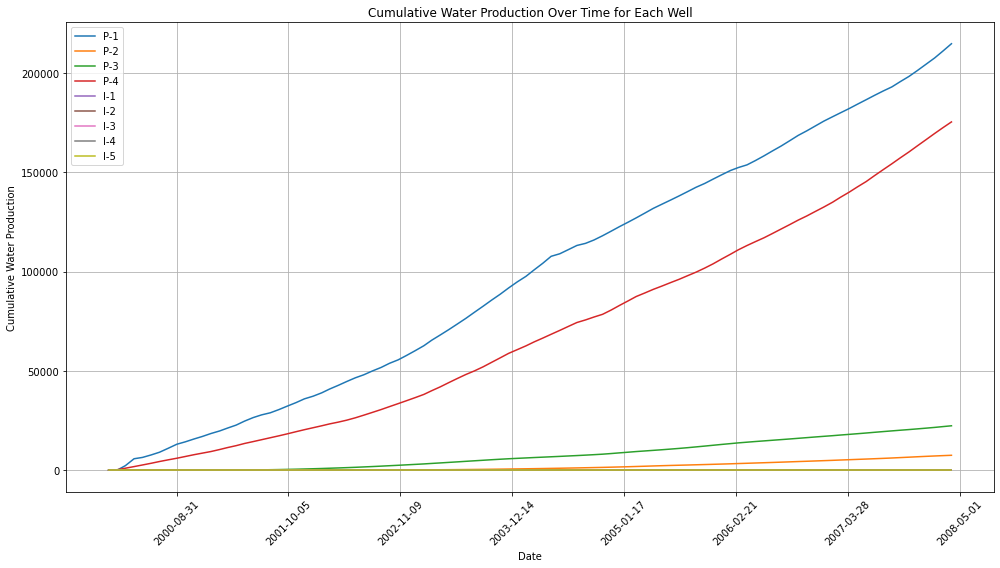

In [38]:
# Calculating the cumulative water production over time for each well
df['Cumulative Water Production'] = df.groupby('Well Name')['Water Production Rate'].cumsum()

# Plotting the cumulative water production over time for each well
plt.figure(figsize=(14, 8))
for well in df['Well Name'].unique():
    subset = df[df['Well Name'] == well]
    plt.plot(subset['Date'], subset['Cumulative Water Production'], label=well)

plt.title('Cumulative Water Production Over Time for Each Well')
plt.xlabel('Date')
plt.ylabel('Cumulative Water Production')

# Adjusting x-axis ticks for better readability
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Limiting the number of x-axis ticks

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The plot above displays the cumulative water production over time for each well:

P-1 exhibits the highest cumulative water production and shows a consistent increase over its lifetime.
P-4 follows closely behind, also demonstrating a steady increase in cumulative water production.
P-3 and P-2 have lower cumulative water productions compared to the other producer wells.
As anticipated, injector wells show no water production.
From this visualization, we can infer the performance and productivity of each well in terms of water production over its operational lifespan.

<hr>

Below is an interactive dropdown for selecting different wells and viewing their "Cumulative Water Production Over Time"

In [39]:
# Create an empty figure for Cumulative Water Production
fig_cumulative = go.Figure()

# Add an interactive dropdown menu for Cumulative Water Production
buttons_cumulative = []
for well in wells:
    well_df = df[df['Well Name'] == well]
    years = well_df['Date'].dt.year.unique()
    visible = [well == w for w in wells]
    
    button = dict(label=well,
                  method='update',
                  args=[{'visible': visible},
                        {'title': f'Cumulative Water Production Over Time for {well}',
                         'xaxis': {'tickvals': years, 'ticktext': years, 'rangeslider': {'visible': True}}}],
                  )
    buttons_cumulative.append(button)
    
    fig_cumulative.add_trace(go.Scatter(x=well_df['Date'], y=well_df['Cumulative Water Production'], mode='lines', name=well))

# Update the layout for Cumulative Water Production
fig_cumulative.update_layout(title=f'Cumulative Water Production Over Time',
                             xaxis_title='Date', 
                             yaxis_title='Cumulative Water Production',
                             updatemenus=[dict(buttons=buttons_cumulative, direction='down', x=1.05, y=1.2, showactive=True)])

# Display the initial well data for Cumulative Water Production
fig_cumulative.update_traces(visible=False)
fig_cumulative.data[0].visible = True

# Display the plot for Cumulative Water Production
fig_cumulative.show()
